<a href="https://colab.research.google.com/github/hdhoot/MLapriori/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('/content/Ads_CTR_Optimisation.csv')

## Importing the dataset

## Implementing UCB

In [3]:
import math
N=10000
d=10
ads_selected=[]
no_of_selection=[0]*d
sum_of_rewards=[0]*d
total_selections=0
for n in range(0,N):
  ad=0
  max_upper_bound=0
  for i in range(0,d):
    if(no_of_selection[i]>0):
      average_reward=sum_of_rewards[i]/no_of_selection[i]
      delta_i=math.sqrt((3/2)*math.log(n+1)/no_of_selection[i])
      upper_bound=average_reward+delta_i
    else:
      upper_bound=1e400
    if(upper_bound > max_upper_bound ):
        max_upper_bound=upper_bound
        ad=i
  ads_selected.append(ad)
  no_of_selection[ad]=no_of_selection[ad]+1
  reward=dataset.values[n,ad]
  sum_of_rewards[ad]=sum_of_rewards[ad]+reward
  total_selections=total_selections+reward

## Visualising the results

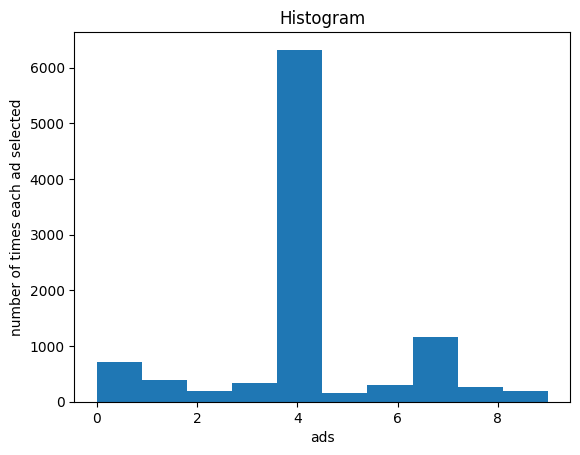

In [4]:
plt.hist(ads_selected)
plt.title('Histogram')
plt.xlabel('ads')
plt.ylabel('number of times each ad selected')
plt.show()